# BodyPerformance
` Data Source: Kaggle / UCI / GitHub repositories`

Objective: Predict physical performance level (A to D) using individuals' physical and physiological characteristics.
## توضیح ستون‌ها
- **Age** : سن فرد (سال)  
- **Gender** : جنسیت (M = مرد، F = زن)  
- **Height_cm** : قد فرد (سانتی‌متر)  
- **Weight_kg** : وزن فرد (کیلوگرم)  
- **Body_fat_%** : درصد چربی بدن  
- **Diastolic** : فشار خون دیاستولیک  
- **Systolic** : فشار خون سیستولیک  
- **GripForce** : قدرت دست یا نیروی مشت (کیلوگرم)  
- **Sit_and_bend_forward_cm** : میزان انعطاف‌پذیری در حالت خم شدن به جلو  
- **Sit_ups_counts** : تعداد دراز و نشست انجام‌شده  
- **Broad_jump_cm** : مسافت پرش از حالت ایستاده (سانتی‌متر)  
- **class** : سطح عملکرد فیزیکی (A، B، C، D)  

<div dir="rtl" align="right" 
     style="font-family: 'Vazir', Tahoma; font-size:16px; line-height:1.8; text-align:right; text-indent: 30px;">
------------هدف: پیشبینی سطح عملکرد فیزیکی با استفاده از ویژگی های بدنی و فیزیولوژیکی افراد
</div>
---

## Import Modules
---

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean, median_abs_deviation, zscore
import numpy as np

# Loading Data
___

In [195]:
df = pd.read_csv("../data/bodyPerformance.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


# General Overview of the Dataset
---

In [196]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [197]:
df.isna().sum()


age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [200]:
df['gender'].value_counts()

gender
M    8467
F    4926
Name: count, dtype: int64

In [201]:
df['class'].value_counts()

class
C    3349
D    3349
A    3348
B    3347
Name: count, dtype: int64

In [198]:
df.duplicated().sum()

np.int64(1)

In [199]:
df[df.duplicated()]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
12473,27.0,F,157.0,49.1,30.7,70.0,86.0,27.7,19.7,51.0,167.0,A


---
### Split Category Columns And Numbers

In [22]:
numeric = df.select_dtypes(exclude='object')
categories = df.select_dtypes(include='object')

In [26]:
numeric

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0
...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0


In [27]:
categories

,gender,class
0,M,C
1,M,A
2,M,C
3,M,B
4,M,B
...,...,...
13388,M,C
13389,M,D
13390,M,A
13391,F,D


---
### Mean And Trimmed Mean

<div dir="rtl" align="right" 
     style="font-family: 'Vazir', Tahoma; font-size:16px; line-height:1.8; text-align:right; text-indent: 30px;">
------------ بررسی میانگین ها
</div>

In [23]:
numeric.mean()

age                         36.775106
height_cm                  168.559807
weight_kg                   67.447316
body fat_%                  23.240165
diastolic                   78.796842
systolic                   130.234817
gripForce                   36.963877
sit and bend forward_cm     15.209268
sit-ups counts              39.771224
broad jump_cm              190.129627
dtype: float64

In [69]:
for column in numeric.columns:
    print(f'{column} - Trimmed Mean: {trim_mean(numeric[column], proportiontocut=0.1)} - Real Mean: {numeric[column].mean()}')
    print("-"*10)
    

age - Trimmed Mean: 35.59197386840877 - Real Mean: 36.77510639886508
----------
height_cm - Trimmed Mean: 168.7281101259916 - Real Mean: 168.5598073620548
----------
weight_kg - Trimmed Mean: 67.06114045730284 - Real Mean: 67.4473157619652
----------
body fat_% - Trimmed Mean: 22.999136605692954 - Real Mean: 23.240164950869858
----------
diastolic - Trimmed Mean: 78.91986934204387 - Real Mean: 78.79684163368923
----------
systolic - Trimmed Mean: 130.22687820811947 - Real Mean: 130.23481669528857
----------
gripForce - Trimmed Mean: 36.8705319645357 - Real Mean: 36.96387739864108
----------
sit and bend forward_cm - Trimmed Mean: 15.796142790480634 - Real Mean: 15.20926827447174
----------
sit-ups counts - Trimmed Mean: 40.53579094727018 - Real Mean: 39.77122377361308
----------
broad jump_cm - Trimmed Mean: 191.86075594960337 - Real Mean: 190.12962741730755
----------


---

### Z-Score

<div dir="rtl" align="right" 
     style="font-family: 'Vazir', Tahoma; font-size:16px; line-height:1.8; text-align:right; text-indent: 30px;">
------------  محاسبه دقیق اختلاف هر مقدار با میانگین با استفاده از Z-score
</div>

In [184]:
z_scores = pd.DataFrame(zscore(numeric), columns=numeric.columns)
z_scores


,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.717432,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009
1,-0.864220,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013
2,-0.423857,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005
3,-0.350463,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176
4,-0.644038,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009
...,...,...,...,...,...,...,...,...,...,...
13388,-0.864220,0.420138,0.364265,-0.970178,-0.446565,0.731658,-0.109547,0.259063,0.506353,0.197418
13389,-1.157795,1.322079,-0.296866,-1.535183,-0.446565,-0.151890,-0.373090,-1.668480,0.576400,-0.580177
13390,0.163293,1.025388,1.092346,-0.432734,-0.074183,0.119971,2.497643,0.140809,0.366259,0.975013
13391,1.998138,-2.665451,-0.815728,2.364730,-1.005140,-0.627647,-1.662566,-0.710621,-2.785848,-2.887878


---
### Mean Absolute Deviation

<div dir="rtl" align="right" 
     style="font-family: 'Vazir', Tahoma; font-size:16px; line-height:1.8; text-align:right; text-indent: 30px;">
------------  بررسی اینکه داده ها به طور متوسط چقدر از میانگین فاصله دارند
مثلا سن هر فرد به طور متوسط ۹ سال با میانگین فاصله دارد
 با استفاده از میانگین انحراف مطلق
</div>


In [166]:
for column in numeric.columns:
    print(f'MAD\t{column}:\t  {median_abs_deviation(df[column]).tolist()}')

MAD	age:	  9.0
MAD	height_cm:	  6.099999999999994
MAD	weight_kg:	  8.540000000000006
MAD	body fat_%:	  5.0
MAD	diastolic:	  8.0
MAD	systolic:	  10.0
MAD	gripForce:	  8.700000000000003
MAD	sit and bend forward_cm:	  4.899999999999999
MAD	sit-ups counts:	  10.0
MAD	broad jump_cm:	  29.0


---
### Standard Diviation

<div dir="rtl" align="right" 
     style="font-family: 'Vazir', Tahoma; font-size:16px; line-height:1.8; text-align:right; text-indent: 30px;">
------------ انحراف معیار
</div>

In [24]:
numeric.std()

age                        13.625639
height_cm                   8.426583
weight_kg                  11.949666
body fat_%                  7.256844
diastolic                  10.742033
systolic                   14.713954
gripForce                  10.624864
sit and bend forward_cm     8.456677
sit-ups counts             14.276698
broad jump_cm              39.868000
dtype: float64

---
### Three Sigma Rule

- mean - std        68%
- mean - 2*std      95%
- mean - 3*std      99.7%

In [81]:
for column in numeric.columns:
    mean = numeric[column].mean()
    std = numeric[column].std()
    print(column.upper())
    print("")
    lower_1_sigma = np.round(mean - std)
    upper_1_sigma = np.round(mean + std)
    print(f"68% between \t{lower_1_sigma} \tand\t {upper_1_sigma}")
    
    lower_2_sigma = np.round(mean - 2*std)
    upper_2_sigma = np.round(mean + 2*std)
    print(f"95% between \t{lower_2_sigma} \tand\t {upper_2_sigma}")
    
    lower_3_sigma = np.round(mean - 3*std)
    upper_3_sigma = np.round(mean + 3*std)
    print(f"99.7% between \t{lower_3_sigma} \tand\t {upper_3_sigma}")
    print("-"*20)

AGE

68% between 	23.0 	and	 50.0
95% between 	10.0 	and	 64.0
99.7% between 	-4.0 	and	 78.0
--------------------
HEIGHT_CM

68% between 	160.0 	and	 177.0
95% between 	152.0 	and	 185.0
99.7% between 	143.0 	and	 194.0
--------------------
WEIGHT_KG

68% between 	55.0 	and	 79.0
95% between 	44.0 	and	 91.0
99.7% between 	32.0 	and	 103.0
--------------------
BODY FAT_%

68% between 	16.0 	and	 30.0
95% between 	9.0 	and	 38.0
99.7% between 	1.0 	and	 45.0
--------------------
DIASTOLIC

68% between 	68.0 	and	 90.0
95% between 	57.0 	and	 100.0
99.7% between 	47.0 	and	 111.0
--------------------
SYSTOLIC

68% between 	116.0 	and	 145.0
95% between 	101.0 	and	 160.0
99.7% between 	86.0 	and	 174.0
--------------------
GRIPFORCE

68% between 	26.0 	and	 48.0
95% between 	16.0 	and	 58.0
99.7% between 	5.0 	and	 69.0
--------------------
SIT AND BEND FORWARD_CM

68% between 	7.0 	and	 24.0
95% between 	-2.0 	and	 32.0
99.7% between 	-10.0 	and	 41.0
--------------------
SIT-UPS COUNT

---
### Skwness


<div dir="rtl" align="right" 
     style="font-family: 'Vazir', Tahoma; font-size:16px; line-height:1.8; text-align:right; text-indent: 30px;">
------------ با استفاده از تابع Skew از همینجا می‌توانیم بفهمیم که چولگی در چه ستون‌هایی مثبت و منفی است
</div>


In [ ]:
numeric.skew()

age                        0.599896
height_cm                 -0.186882
weight_kg                  0.349805
body fat_%                 0.361132
diastolic                 -0.159637
systolic                  -0.048654
gripForce                  0.018456
sit and bend forward_cm    0.785492
sit-ups counts            -0.467830
broad jump_cm             -0.422623
dtype: float64

---
### kurtosis

<div dir="rtl" align="right" 
     style="font-family: 'Vazir', Tahoma; font-size:16px; line-height:1.8; text-align: right;">
|    بررسی قله در ستون های عددی
</div>


In [150]:
numeric.kurt()

age                        -1.017671
height_cm                  -0.433053
weight_kg                   0.171606
body fat_%                  0.128712
diastolic                   0.363525
systolic                    0.380285
gripForce                  -0.822200
sit and bend forward_cm    35.220856
sit-ups counts             -0.156326
broad jump_cm               0.002397
dtype: float64

---
### Quartile
<div dir="rtl" align="right" style="font-family: 'Vazir', 'Tahoma'; font-size: 16px; line-height: 1.8;">
            ------------         IQR بالا نشان دهنده پراکندگی در اون ستون هست

</div>


In [142]:
for column in numeric.columns:
    Q1 = numeric[column].quantile(0.25)
    Q3 = numeric[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"{column}   Q1: 25% > {Q1} - Q3: 75% <= {Q3} - IQR: {IQR}")
    print(f"Outlier range: {lower_bound} - {upper_bound}")
    print("-"*40)

age   Q1: 25% > 25.0 - Q3: 75% <= 48.0 - IQR: 23.0
Outlier range: -9.5 - 82.5
----------------------------------------
height_cm   Q1: 25% > 162.4 - Q3: 75% <= 174.8 - IQR: 12.400000000000006
Outlier range: 143.8 - 193.40000000000003
----------------------------------------
weight_kg   Q1: 25% > 58.2 - Q3: 75% <= 75.3 - IQR: 17.099999999999994
Outlier range: 32.55000000000001 - 100.94999999999999
----------------------------------------
body fat_%   Q1: 25% > 18.0 - Q3: 75% <= 28.0 - IQR: 10.0
Outlier range: 3.0 - 43.0
----------------------------------------
diastolic   Q1: 25% > 71.0 - Q3: 75% <= 86.0 - IQR: 15.0
Outlier range: 48.5 - 108.5
----------------------------------------
systolic   Q1: 25% > 120.0 - Q3: 75% <= 141.0 - IQR: 21.0
Outlier range: 88.5 - 172.5
----------------------------------------
gripForce   Q1: 25% > 27.5 - Q3: 75% <= 45.2 - IQR: 17.700000000000003
Outlier range: 0.9499999999999957 - 71.75
----------------------------------------
sit and bend forward_cm   Q

## BoxPlots


In [114]:
print(f"Columns: {len(numeric.columns)}")

Columns: 10


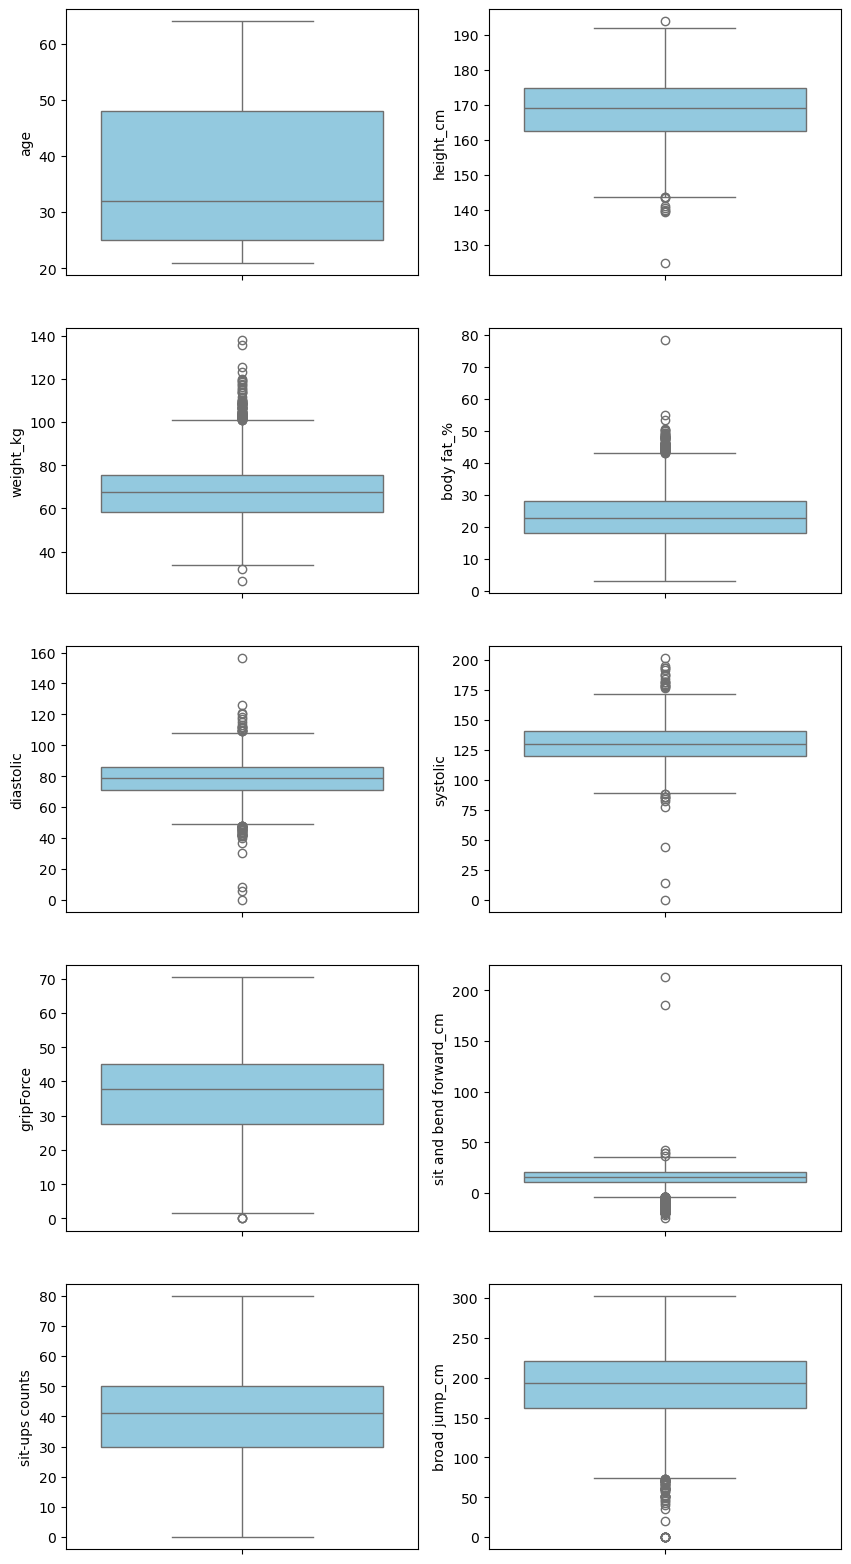

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
ax = ax.flatten() # -->  AI

for i, column in enumerate(numeric.columns):
    sns.boxplot(y=numeric[column], ax=ax[i], color='skyblue')

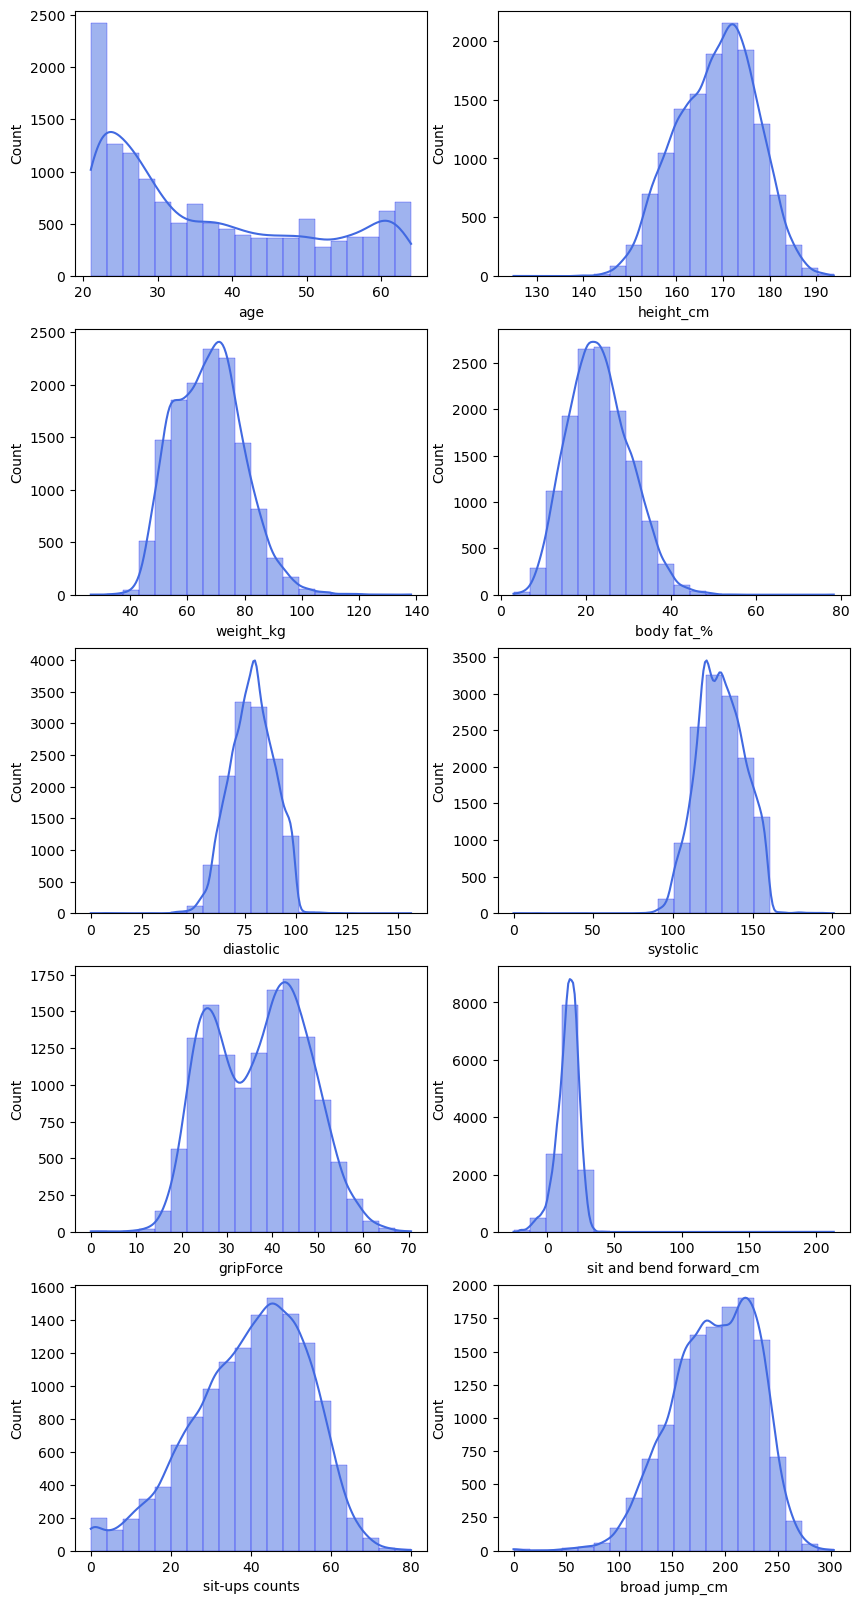

In [149]:
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
ax = ax.flatten() # -->  AI

for i, column in enumerate(numeric.columns):
    sns.histplot(numeric[column], ax=ax[i], color='royalblue', kde=True, linewidth=0.2, bins=20, edgecolor='blue')

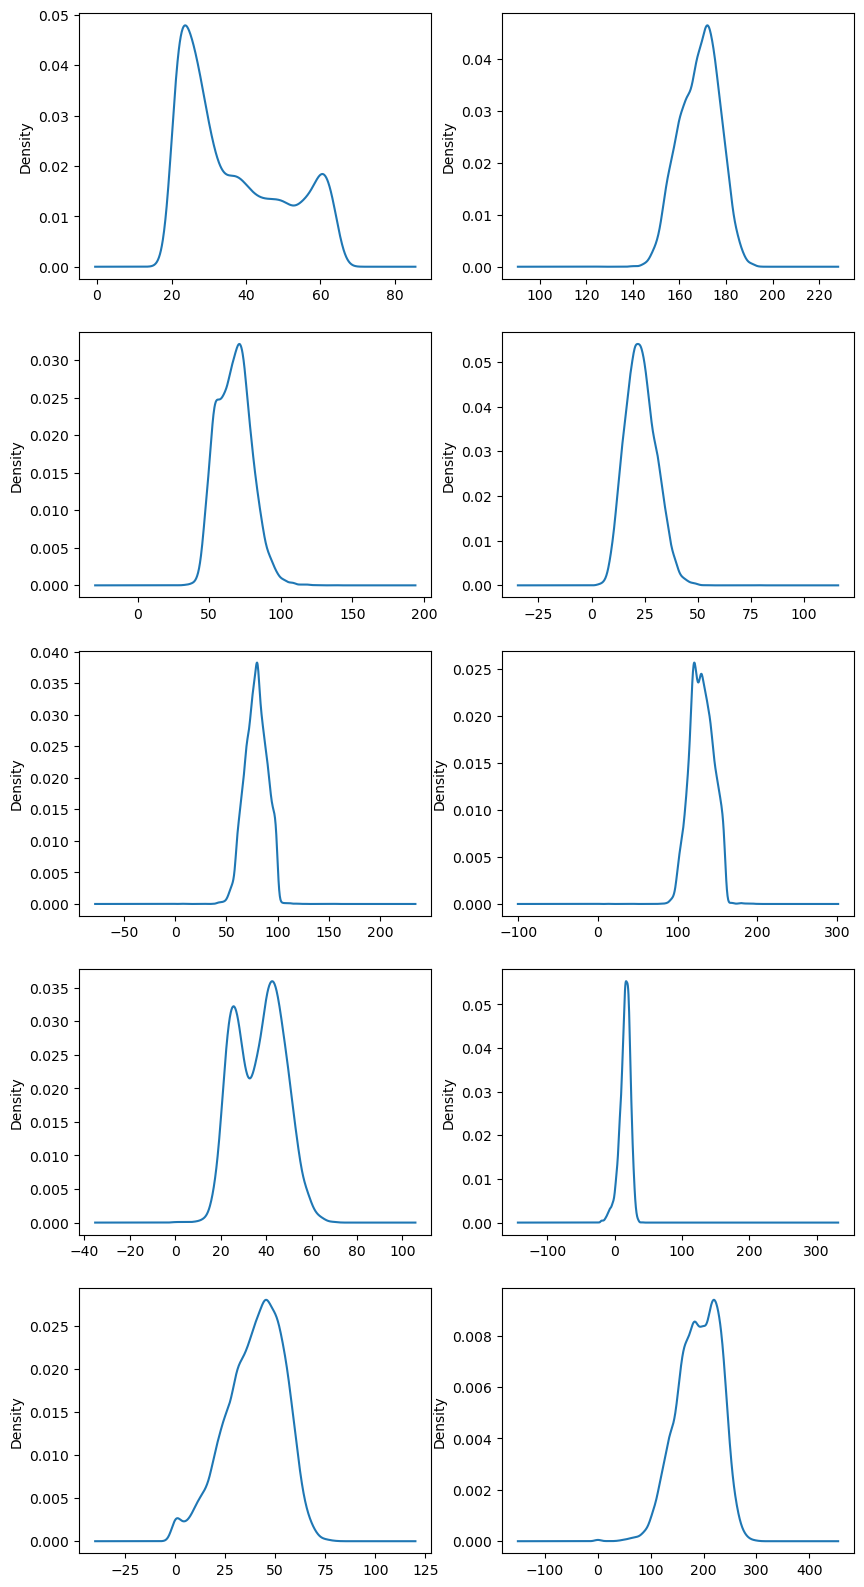

In [151]:
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
ax = ax.flatten() # -->  AI

for i, column in enumerate(numeric.columns):
    df[column].plot(kind='density', ax=ax[i]);
    

<div dir="rtl" align="right" style="font-family: 'Vazir', 'Tahoma'; font-size: 16px; line-height: 1.8;">
            ------------           نمودار چگالی که به وضوح نشان میدهد که داده ها در چه مقادیر بیشتری متمرکز اند                  

</div>


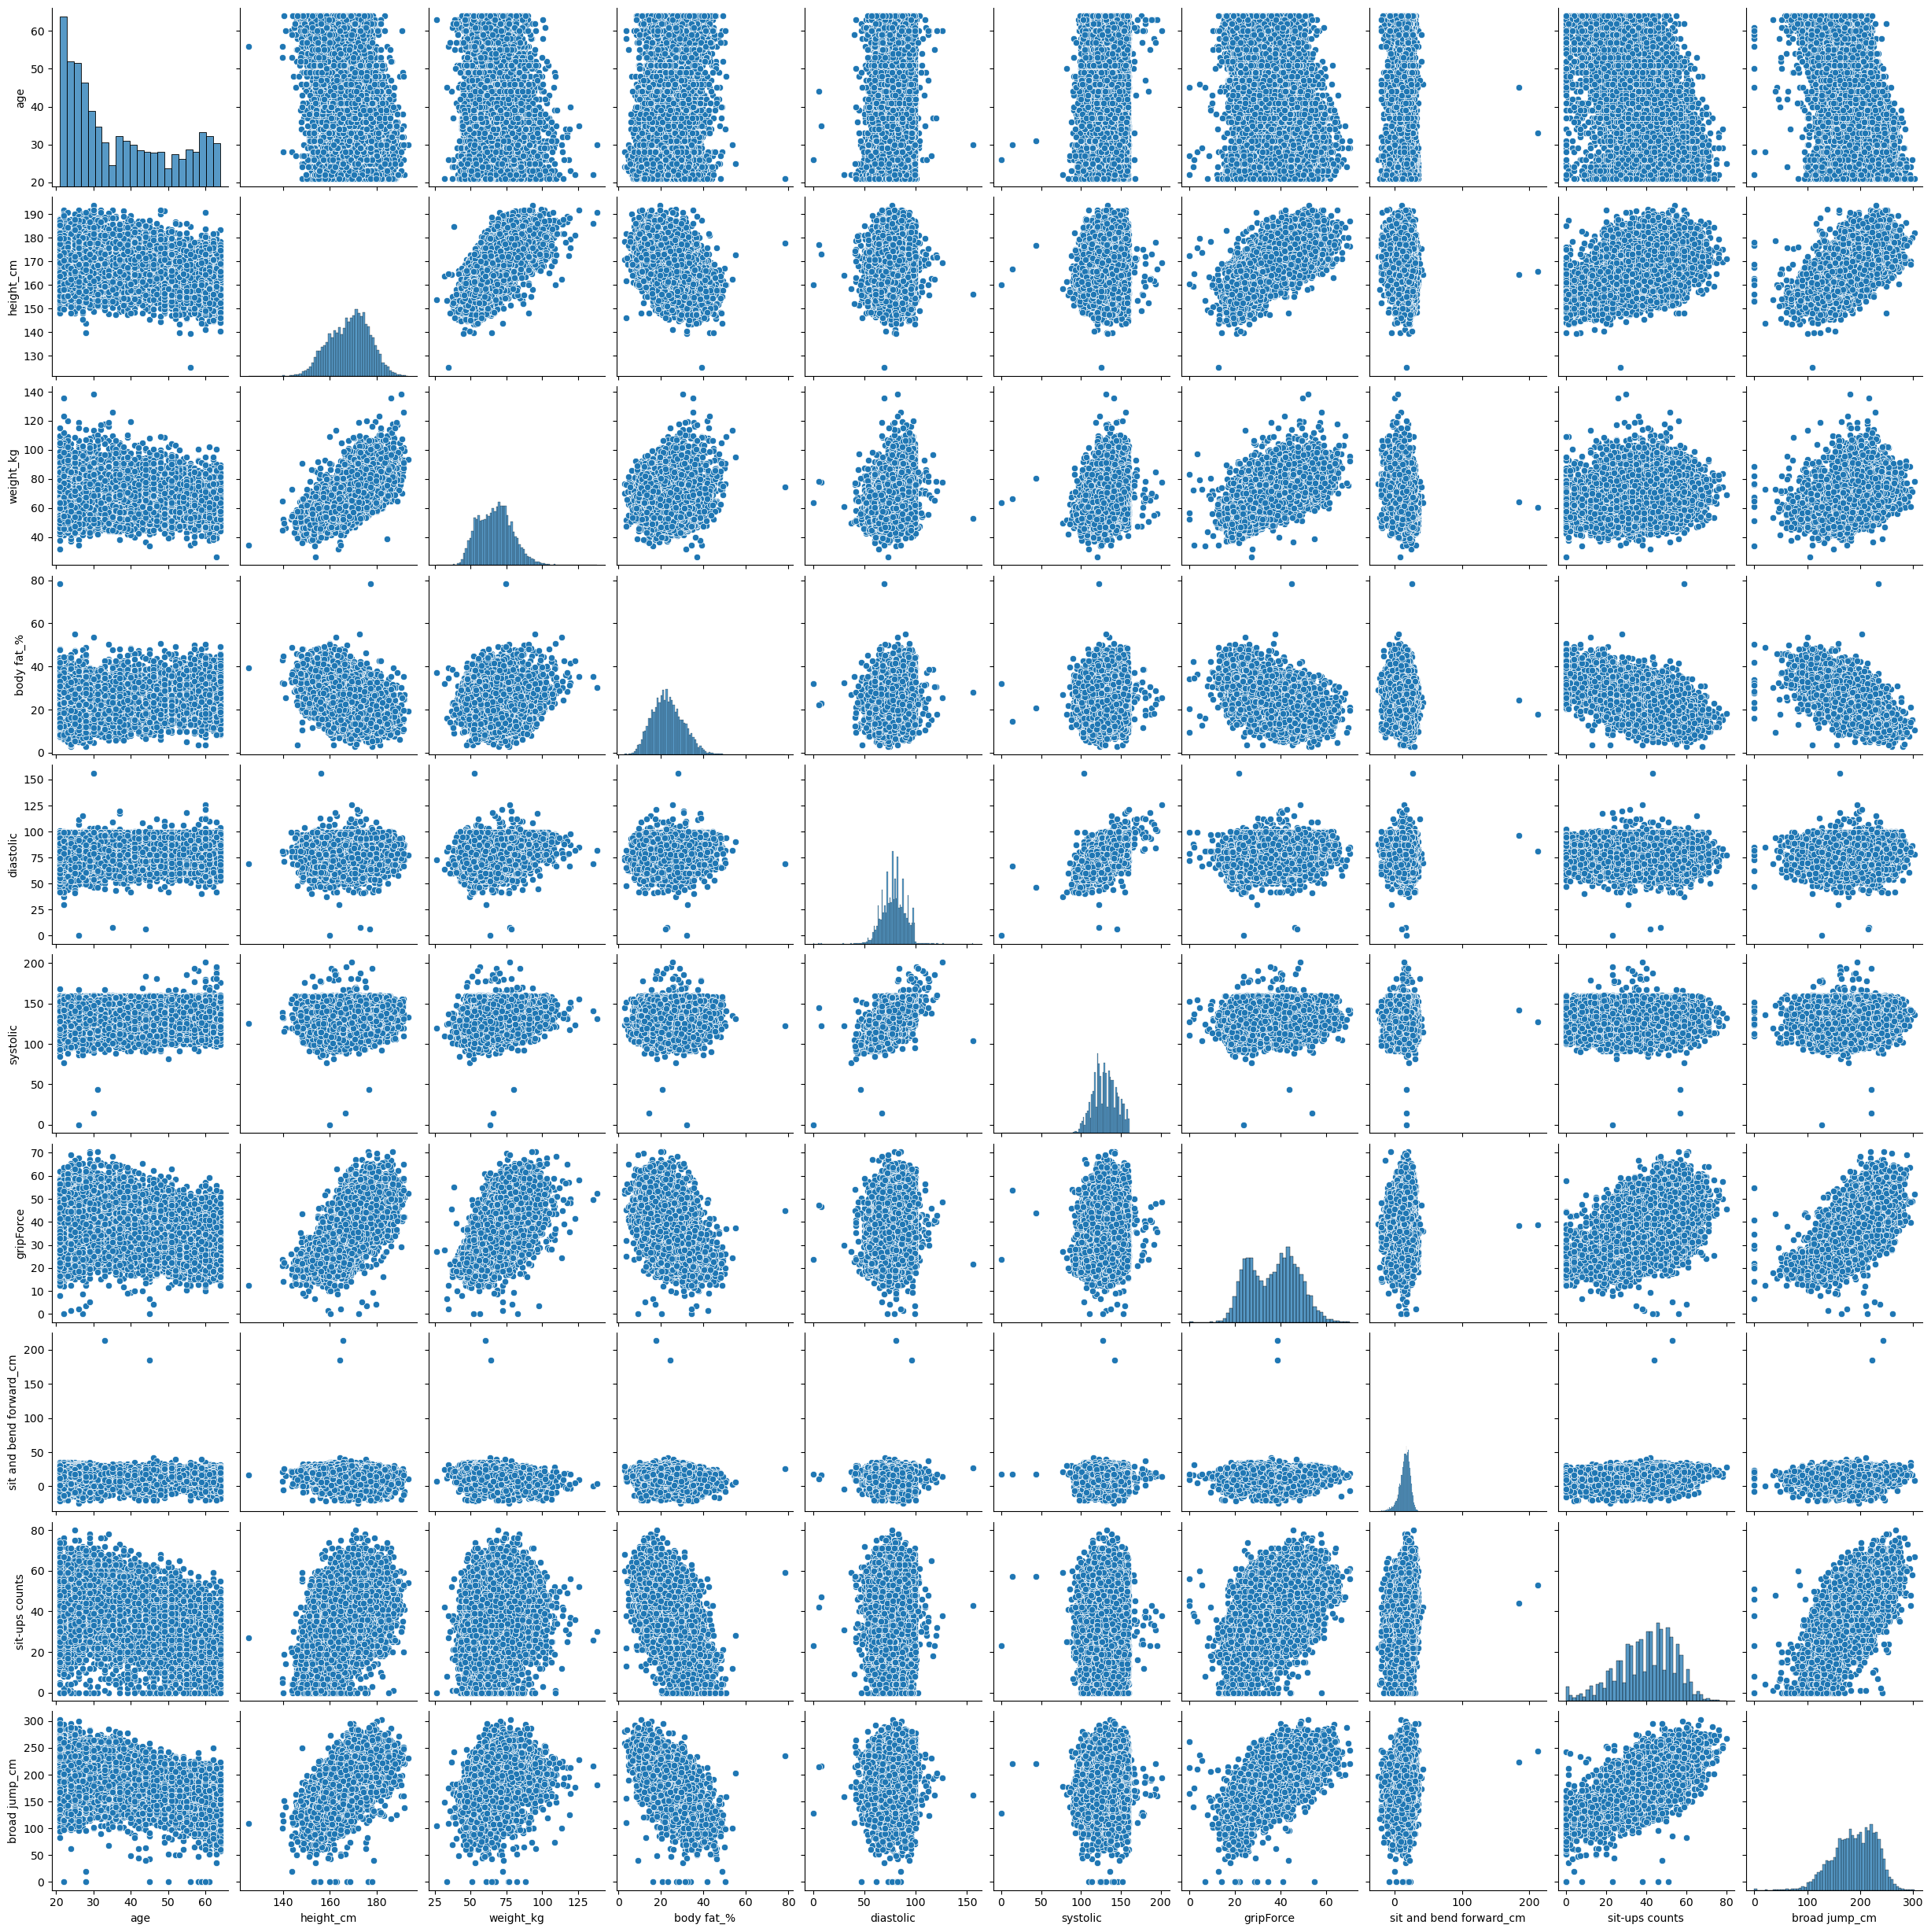

In [172]:
sns.pairplot(numeric)

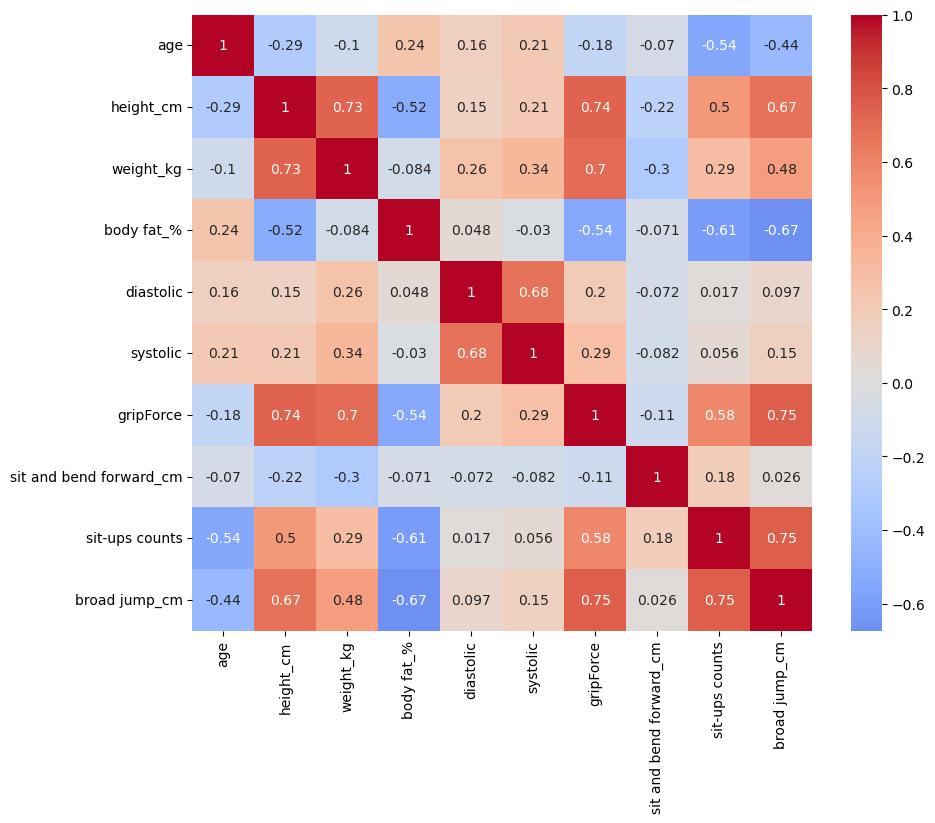

In [173]:
corr = numeric.corr()  
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.show()
